In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [571]:
# For NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [573]:
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import resample

In [575]:
# Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [577]:
# Download required resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NWUUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NWUUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NWUUSER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [578]:
data=pd.read_csv(r"C:\Users\NWUUSER\Downloads\kdd\meta.csv",nrows=10000)

In [581]:
data.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [583]:
data.isnull().sum()

SeriesInstanceUID    0
StudyInstanceUID     0
Modality             0
SeriesDescription    0
BodyPartExamined     0
SeriesNumber         0
Collection           0
Visibility           0
ImageCount           0
dtype: int64

In [585]:
data.describe(include='all')

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
count,1000,1000,1000,1000,1000,1000.0,1000,1000.0,1000.000000
unique,1000,1000,1,3,1,NaN,1,NaN,NaN
top,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,NaN,CBIS-DDSM,NaN,NaN
freq,1,1,1000,906,1000,NaN,1000,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.841000
std,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.365859
min,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.000000
25%,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.000000
50%,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.000000
75%,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.000000


<Axes: xlabel='SeriesInstanceUID'>

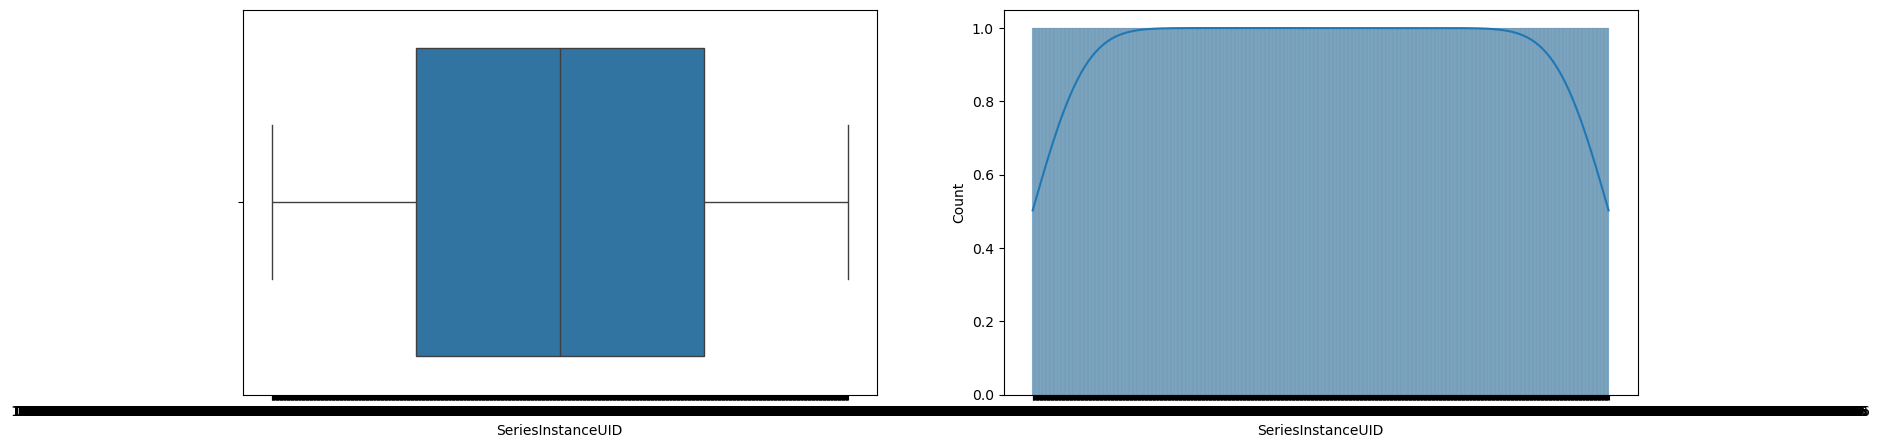

In [587]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'SeriesInstanceUID', data = data, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'SeriesInstanceUID', data = data)

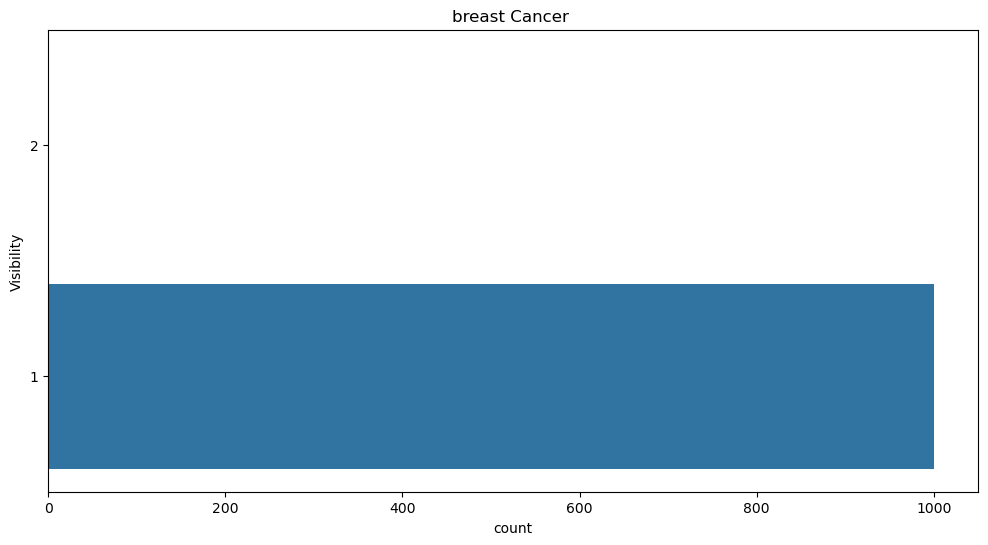

In [588]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display distribution of the 'sub_category_1' column
plt.figure(figsize=(12, 6))
sns.countplot(y='Visibility', data=data, order = data['ImageCount'].value_counts().index)
plt.title("breast Cancer ")
plt.show()


In [589]:
import pandas as pd

def preprocessing(data):
    # Print column names to verify
    print("Existing columns:", data.columns.tolist())
    
    # Define the correct column names based on your DataFrame
    stops_column = 'ImageCount'  # Update this if the actual column name is different
    class_column = 'Visibility'  # Update this if the actual column name is different
    
    # Check if the required columns exist
    if stops_column not in data.columns:
        raise KeyError(f"Column '{stops_column}' is not found in the DataFrame.")
    if class_column not in data.columns:
        raise KeyError(f"Column '{class_column}' is not found in the DataFrame.")
    
    # Encode the ordinal variables
    data[stops_column] = data[stops_column].replace({'zero': 0, 'one': 1, 'two_or_more': 2}).astype(int)
    data[class_column] = data[class_column].replace({'Economy': 0, 'Business': 1}).astype(int)
    
    # Create dummy variables for categorical features
    dummies_variables = ["SeriesInstanceUID", "StudyInstanceUID", "StudyInstanceUID", "SeriesDescription", "Collection"]
    dummies = pd.get_dummies(data[dummies_variables], drop_first=True)
    
    # Concatenate dummies with the original DataFrame
    data = pd.concat([data, dummies], axis=1)
    
    # Drop the original categorical columns
    data = data.drop(columns=dummies_variables)
    
    return data

# Example usage
data = pd.read_csv(r"C:\Users\NWUUSER\Downloads\kdd\meta.csv",nrows=10000)
data_preprocessed = preprocessing(data)
print(data_preprocessed.head())


Existing columns: ['SeriesInstanceUID', 'StudyInstanceUID', 'Modality', 'SeriesDescription', 'BodyPartExamined', 'SeriesNumber', 'Collection', 'Visibility', 'ImageCount']
  Modality BodyPartExamined  SeriesNumber  Visibility  ImageCount  \
0       MG           BREAST             1           1           2   
1       MG           BREAST             1           1           2   
2       MG           BREAST             1           1           2   
3       MG           BREAST             1           1           2   
4       MG           BREAST             1           1           2   

   SeriesInstanceUID_1.3.6.1.4.1.9590.100.1.2.101493470410482092525730380153954599203  \
0                                              False                                    
1                                              False                                    
2                                              False                                    
3                                              False      

In [590]:
data_preprocessed = preprocessing(data)

Existing columns: ['SeriesInstanceUID', 'StudyInstanceUID', 'Modality', 'SeriesDescription', 'BodyPartExamined', 'SeriesNumber', 'Collection', 'Visibility', 'ImageCount']


In [591]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Example DataFrame
data = pd.DataFrame({'Visibility': ['Some text', '', None]})

# Preprocess and fill missing values
data['Visibility'] = data['Visibility'].astype(str).fillna("")

# Optionally preprocess text
def preprocess_text(text):
    # Tokenize, lemmatize, and remove stop words if needed
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]
    return ' '.join(tokens)

data['Processed_Visibility'] = data['Visibility'].apply(preprocess_text)

# Check processed data
print(data['Processed_Visibility'].head())

# Apply TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words=None)  # Adjust stop words parameter if necessary
X = vectorizer.fit_transform(data['Processed_Visibility'])
print(f"Shape of the transformed matrix: {X.shape}")


0    text
1        
2    None
Name: Processed_Visibility, dtype: object
Shape of the transformed matrix: (3, 2)


In [592]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import GaussianNB

# Load the data
data = pd.read_csv(r"C:\Users\NWUUSER\Downloads\kdd\meta.csv",nrows=10000)

# Sample the data to reduce size (if needed)
data_sampled = data.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Split data into features and target
X = data_sampled.drop(columns='Visibility')  # Replace 'target' with your actual target column
y = data_sampled['Visibility']  # Replace 'target' with your actual target column

# Ensure all data in X is numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN
X = X.fillna(0)  # Replace NaNs with 0 or another appropriate value

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to sparse matrix if the data is sparse
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# Initialize classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'SGDClassifier': SGDClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
    
}

# Store F1 scores
f1_scores = {}

for name, clf in classifiers.items():
    try:
        # Fit the classifier
        clf.fit(X_train_sparse, y_train)
        # Predict on the test set
        y_pred = clf.predict(X_test_sparse)
        # Calculate F1 score
        f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
    except MemoryError:
        print(f"MemoryError occurred for {name}")
    except ValueError as e:
        print(f"ValueError occurred for {name}: {e}")

# Output F1 scores
print(f1_scores)

ValueError occurred for SGDClassifier: The number of classes has to be greater than one; got 1 class
ValueError occurred for Support Vector Machine: The number of classes has to be greater than one; got 1 class
{'RandomForest': 1.0, 'K-Nearest Neighbors': 1.0, 'Decision Tree': 1.0}


In [593]:
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"Best model is {best_model_name} with F1 score of {f1_scores[best_model_name]}")

Best model is RandomForest with F1 score of 1.0
